Filtering annotated variants to extract nsSNVs for ML

In [1]:
import pandas as pd
pd.set_option('display.max_rows', None)
import numpy as np
from tqdm import tqdm 
import yaml
import seaborn as sns
import matplotlib.pyplot as plt
import os
os.chdir( '/data/project/worthey_lab/projects/experimental_pipelines/tarun/ditto/data/processed/')

In [2]:
# Function to open and load config file for filtering columns and rows
def get_col_configs(config_f):
    with open(config_f) as fh:
        config_dict = yaml.safe_load(fh)

    # print(config_dict)
    return config_dict


In [3]:
# Load the config file as dictionary
config_f = "../../configs/dbnsfp_column_config.yaml"
config_dict = get_col_configs(config_f)

In [4]:
config_dict["columns"]

['#chr',
 'pos(1-based)',
 'ref',
 'alt',
 'aaref',
 'aaalt',
 'genename',
 'Ensembl_geneid',
 'Ensembl_transcriptid',
 'Ensembl_proteinid',
 'Uniprot_acc',
 'cds_strand',
 'SIFT_score',
 'SIFT_converted_rankscore',
 'SIFT_pred',
 'SIFT4G_score',
 'SIFT4G_converted_rankscore',
 'SIFT4G_pred',
 'Polyphen2_HDIV_score',
 'Polyphen2_HDIV_rankscore',
 'Polyphen2_HDIV_pred',
 'Polyphen2_HVAR_score',
 'Polyphen2_HVAR_rankscore',
 'Polyphen2_HVAR_pred',
 'LRT_score',
 'LRT_converted_rankscore',
 'LRT_pred',
 'LRT_Omega',
 'MutationTaster_converted_rankscore',
 'MutationAssessor_score',
 'MutationAssessor_rankscore',
 'MutationAssessor_pred',
 'FATHMM_score',
 'FATHMM_converted_rankscore',
 'FATHMM_pred',
 'PROVEAN_score',
 'PROVEAN_converted_rankscore',
 'PROVEAN_pred',
 'VEST4_score',
 'VEST4_rankscore',
 'MetaSVM_score',
 'MetaSVM_rankscore',
 'MetaSVM_pred',
 'MetaLR_score',
 'MetaLR_rankscore',
 'MetaLR_pred',
 'Reliability_index',
 'MetaRNN_score',
 'MetaRNN_rankscore',
 'MetaRNN_pred',
 

In [5]:
print('Loading data...')
df = pd.read_csv("../interim/dbNSFP_clinvar_variants_parsed.tsv.gz", sep='\t', usecols=config_dict["columns"], low_memory=False)
print('Data Loaded !....')


Loading data...
Data Loaded !....


In [6]:
df.columns.to_list()

['#chr',
 'pos(1-based)',
 'ref',
 'alt',
 'aaref',
 'aaalt',
 'genename',
 'Ensembl_geneid',
 'Ensembl_transcriptid',
 'Ensembl_proteinid',
 'Uniprot_acc',
 'cds_strand',
 'SIFT_score',
 'SIFT_converted_rankscore',
 'SIFT_pred',
 'SIFT4G_score',
 'SIFT4G_converted_rankscore',
 'SIFT4G_pred',
 'Polyphen2_HDIV_score',
 'Polyphen2_HDIV_rankscore',
 'Polyphen2_HDIV_pred',
 'Polyphen2_HVAR_score',
 'Polyphen2_HVAR_rankscore',
 'Polyphen2_HVAR_pred',
 'LRT_score',
 'LRT_converted_rankscore',
 'LRT_pred',
 'LRT_Omega',
 'MutationTaster_converted_rankscore',
 'MutationAssessor_score',
 'MutationAssessor_rankscore',
 'MutationAssessor_pred',
 'FATHMM_score',
 'FATHMM_converted_rankscore',
 'FATHMM_pred',
 'PROVEAN_score',
 'PROVEAN_converted_rankscore',
 'PROVEAN_pred',
 'VEST4_score',
 'VEST4_rankscore',
 'MetaSVM_score',
 'MetaSVM_rankscore',
 'MetaSVM_pred',
 'MetaLR_score',
 'MetaLR_rankscore',
 'MetaLR_pred',
 'Reliability_index',
 'MetaRNN_score',
 'MetaRNN_rankscore',
 'MetaRNN_pred',
 

In [7]:
df.shape

(1937625, 268)

In [8]:
df = df.replace('.', np.nan)
df = df.replace('-', np.nan)

In [9]:
for key in tqdm(df.columns):
            try:
                df[key] = (
                    df[key]
                    .astype("float32")
                )
            except:
                df[key] = df[key]

100%|██████████| 268/268 [00:19<00:00, 13.55it/s]


In [10]:
df.dtypes

#chr                                            object
pos(1-based)                                   float32
ref                                             object
alt                                             object
aaref                                           object
aaalt                                           object
genename                                        object
Ensembl_geneid                                  object
Ensembl_transcriptid                            object
Ensembl_proteinid                               object
Uniprot_acc                                     object
cds_strand                                      object
SIFT_score                                     float32
SIFT_converted_rankscore                       float32
SIFT_pred                                       object
SIFT4G_score                                   float32
SIFT4G_converted_rankscore                     float32
SIFT4G_pred                                     object
Polyphen2_

In [11]:
#Drop variants with leass than 30% of data along with duplicates. Also delete columns with all null values.
print('Dropping empty columns and rows along with duplicate rows...')
#df.dropna(axis=1, thresh=(df.shape[0]*0.15), inplace=True)  #thresh=(df.shape[0]/4)
df.dropna(axis=0, thresh=(df.shape[1]*0.3), inplace=True)  #thresh=(df.shape[1]*0.3),   how='all',
df.drop_duplicates()
df.dropna(axis=1, how='all', inplace=True)  #thresh=(df.shape[0]/4)
print('\nData shape (nsSNV) =', df.shape)
print('\nclinvar_CLNSIG:\n', df['clinvar_clnsig'].value_counts())
print('\nclinvar_review:\n', df['clinvar_review'].value_counts())
print('\nInterpro_domain:\n', df['Interpro_domain'].value_counts())

Dropping empty columns and rows along with duplicate rows...

Data shape (nsSNV) = (1774323, 268)

clinvar_CLNSIG:
 Uncertain_significance                                                    1216719
Conflicting_interpretations_of_pathogenicity                               115346
Pathogenic                                                                 110685
Likely_pathogenic                                                           88317
Likely_benign                                                               76815
Benign                                                                      74636
not_provided                                                                33035
Benign/Likely_benign                                                        27175
Pathogenic/Likely_pathogenic                                                24944
other                                                                        1887
drug_response                                                   

In [12]:
#Filter variants for clinvar_review
df= df.loc[df['clinvar_review'].isin(config_dict['CLNREVSTAT'])]
df= df.loc[df['clinvar_clnsig'].isin(config_dict['ClinicalSignificance'])]
print('\nData shape (nsSNV) =', df.shape)
print('\nclinvar_CLNSIG:\n', df['clinvar_clnsig'].value_counts())
print('\nclinvar_review:\n', df['clinvar_review'].value_counts())


Data shape (nsSNV) = (1521194, 268)

clinvar_CLNSIG:
 Uncertain_significance          1184498
Benign                            73635
Likely_pathogenic                 72897
Likely_benign                     72434
Pathogenic                        68392
Benign/Likely_benign              26904
Pathogenic/Likely_pathogenic      22434
Name: clinvar_clnsig, dtype: int64

clinvar_review:
 criteria_provided,_single_submitter                     1171873
criteria_provided,_multiple_submitters,_no_conflicts     336920
reviewed_by_expert_panel                                  12328
practice_guideline                                           73
Name: clinvar_review, dtype: int64


In [13]:
# Check if there are any categorical columns
num_cols = df._get_numeric_data().columns

list(set(df.columns) - set(num_cols))

['MutationAssessor_pred',
 'Polyphen2_HDIV_pred',
 'ClinPred_pred',
 'MetaRNN_pred',
 'MetaLR_pred',
 'BayesDel_noAF_pred',
 'DEOGEN2_pred',
 'PROVEAN_pred',
 'fathmm-MKL_coding_pred',
 'genename',
 'Interpro_domain',
 'Ensembl_transcriptid',
 'clinvar_clnsig',
 'clinvar_review',
 'aaref',
 'SIFT_pred',
 'cds_strand',
 'alt',
 'SIFT4G_pred',
 'Ensembl_geneid',
 'MetaSVM_pred',
 'ref',
 '#chr',
 'PrimateAI_pred',
 'fathmm-XF_coding_pred',
 'M-CAP_pred',
 'Ensembl_proteinid',
 'BayesDel_addAF_pred',
 'LRT_pred',
 'FATHMM_pred',
 'Uniprot_acc',
 'Polyphen2_HVAR_pred',
 'LIST-S2_pred',
 'aaalt']

In [14]:
len(list(set(df.columns) - set(num_cols)))

34

In [15]:
df[list(set(df.columns) - set(num_cols))].head()

,MutationAssessor_pred,Polyphen2_HDIV_pred,ClinPred_pred,MetaRNN_pred,MetaLR_pred,BayesDel_noAF_pred,DEOGEN2_pred,PROVEAN_pred,fathmm-MKL_coding_pred,genename,...,fathmm-XF_coding_pred,M-CAP_pred,Ensembl_proteinid,BayesDel_addAF_pred,LRT_pred,FATHMM_pred,Uniprot_acc,Polyphen2_HVAR_pred,LIST-S2_pred,aaalt
0,NaN,NaN,D,D,T,D,D,NaN,D,SAMD11,...,D,T,ENSP00000411579,D,N,NaN,A6PWC8,NaN,D,E
1,NaN,NaN,D,D,T,D,NaN,D,D,SAMD11,...,D,T,ENSP00000393181,D,N,NaN,Q5SV95,NaN,D,E
2,M,D,D,D,T,D,T,D,D,SAMD11,...,D,T,ENSP00000342313,D,N,NaN,Q96NU1,P,D,E
3,NaN,NaN,D,D,T,D,T,NaN,D,SAMD11,...,D,T,ENSP00000480870,D,N,NaN,A0A087WXB3,NaN,D,E
4,NaN,NaN,D,D,T,D,T,NaN,D,SAMD11,...,D,T,ENSP00000482138,D,N,NaN,A0A087WYW1,NaN,D,E


In [17]:
df1 = df

In [19]:
# Classes for training
config_dict['Clinsig_train']

['Benign', 'Pathogenic', 'Likely_pathogenic', 'Likely_benign']

In [20]:
config_dict['Clinsig_test']

['Pathogenic/Likely_pathogenic', 'Benign/Likely_benign']

In [21]:
train_df = df.loc[df['clinvar_clnsig'].isin(config_dict['Clinsig_train'])]
test_df= df.loc[df['clinvar_clnsig'].isin(config_dict['Clinsig_test'])]


In [22]:
print('\nTest data shape (nsSNV) =', test_df.shape)
print('\nTrain data shape (nsSNV) =', train_df.shape)


Test data shape (nsSNV) = (49338, 268)

Train data shape (nsSNV) = (287358, 268)


In [23]:
df = train_df
print('\nclinvar_clnsig:\n', df['clinvar_clnsig'].value_counts())


clinvar_clnsig:
 Benign               73635
Likely_pathogenic    72897
Likely_benign        72434
Pathogenic           68392
Name: clinvar_clnsig, dtype: int64


In [24]:
# Check how many columns are null
df.isnull().sum(axis = 0)

#chr                                                0
pos(1-based)                                        0
ref                                                 0
alt                                                 0
aaref                                           10879
aaalt                                           10879
genename                                            0
Ensembl_geneid                                      0
Ensembl_transcriptid                                0
Ensembl_proteinid                                   0
Uniprot_acc                                      4942
cds_strand                                     148801
SIFT_score                                     121119
SIFT_converted_rankscore                        49567
SIFT_pred                                      121119
SIFT4G_score                                    96653
SIFT4G_converted_rankscore                      51163
SIFT4G_pred                                     96653
Polyphen2_HDIV_score        

In [25]:
#Convert classes from HGMD and ClinVar to either "high_impact" or "Low_impact"
y = df['clinvar_clnsig'].str.replace(r'Likely_pathogenic','high_impact').str.replace(r'Pathogenic','high_impact')
y = y.str.replace(r'Likely_benign','low_impact').str.replace(r'Benign','low_impact')
print('\nImpact (Class):\n', y.value_counts())


Impact (Class):
 low_impact     146069
high_impact    141289
Name: clinvar_clnsig, dtype: int64


In [26]:
#Drop the class column
df = df.drop('clinvar_clnsig', axis=1)
#df['hgmd_class'] = y

In [27]:
config_dict['var']

['#chr',
 'pos(1-based)',
 'ref',
 'alt',
 'aaref',
 'aaalt',
 'genename',
 'Ensembl_geneid',
 'Ensembl_transcriptid',
 'Ensembl_proteinid',
 'Uniprot_acc',
 'clinvar_review',
 'Interpro_domain']

In [28]:
# Drop variant info columns so we can perform one-hot encoding
var = df[config_dict['var']]
df = df.drop(config_dict['var'], axis=1)

In [29]:
df.shape

(287358, 254)

In [30]:
# Check if there are any categorical columns
num_cols = df._get_numeric_data().columns

list(set(df.columns) - set(num_cols))

['MutationAssessor_pred',
 'Polyphen2_HDIV_pred',
 'ClinPred_pred',
 'MetaRNN_pred',
 'MetaLR_pred',
 'BayesDel_noAF_pred',
 'DEOGEN2_pred',
 'PROVEAN_pred',
 'fathmm-MKL_coding_pred',
 'SIFT_pred',
 'cds_strand',
 'SIFT4G_pred',
 'MetaSVM_pred',
 'PrimateAI_pred',
 'fathmm-XF_coding_pred',
 'M-CAP_pred',
 'BayesDel_addAF_pred',
 'LRT_pred',
 'FATHMM_pred',
 'Polyphen2_HVAR_pred',
 'LIST-S2_pred']

In [31]:
df[list(set(df.columns) - set(num_cols))].head()

,MutationAssessor_pred,Polyphen2_HDIV_pred,ClinPred_pred,MetaRNN_pred,MetaLR_pred,BayesDel_noAF_pred,DEOGEN2_pred,PROVEAN_pred,fathmm-MKL_coding_pred,SIFT_pred,...,SIFT4G_pred,MetaSVM_pred,PrimateAI_pred,fathmm-XF_coding_pred,M-CAP_pred,BayesDel_addAF_pred,LRT_pred,FATHMM_pred,Polyphen2_HVAR_pred,LIST-S2_pred
11,NaN,NaN,T,T,T,T,T,NaN,D,NaN,...,NaN,T,T,D,NaN,T,D,NaN,NaN,D
12,NaN,NaN,T,T,T,T,NaN,D,D,D,...,T,T,T,D,NaN,T,D,NaN,NaN,D
13,M,D,T,T,T,T,T,D,D,D,...,T,T,T,D,NaN,T,D,NaN,P,D
14,NaN,NaN,T,T,T,T,T,NaN,D,NaN,...,T,T,T,D,NaN,T,D,NaN,NaN,D
15,NaN,NaN,T,T,T,T,T,NaN,D,NaN,...,T,T,T,D,NaN,T,D,NaN,NaN,D


In [32]:
median_scores = df.median().to_dict()
median_scores

{'SIFT_score': 0.020999999716877937,
 'SIFT_converted_rankscore': 0.5748000144958496,
 'SIFT4G_score': 0.04600000008940697,
 'SIFT4G_converted_rankscore': 0.5663999915122986,
 'Polyphen2_HDIV_score': 0.902999997138977,
 'Polyphen2_HDIV_rankscore': 0.5759900212287903,
 'Polyphen2_HVAR_score': 0.5410000085830688,
 'Polyphen2_HVAR_rankscore': 0.57014000415802,
 'LRT_score': 2.4000000848900527e-05,
 'LRT_converted_rankscore': 0.5587499737739563,
 'LRT_Omega': 0.08483199775218964,
 'MutationTaster_converted_rankscore': 0.8100100159645081,
 'MutationAssessor_score': 1.9850000143051147,
 'MutationAssessor_rankscore': 0.5646899938583374,
 'FATHMM_score': -0.9700000286102295,
 'FATHMM_converted_rankscore': 0.7842699885368347,
 'PROVEAN_score': -2.3399999141693115,
 'PROVEAN_converted_rankscore': 0.5808500051498413,
 'VEST4_score': 0.5770000219345093,
 'VEST4_rankscore': 0.6790800094604492,
 'MetaSVM_score': -0.3720000088214874,
 'MetaSVM_rankscore': 0.7289999723434448,
 'MetaLR_score': 0.375999

In [33]:
config_dict['allele_freq_columns']

['1000Gp3_AF',
 '1000Gp3_AFR_AF',
 '1000Gp3_EUR_AF',
 '1000Gp3_AMR_AF',
 '1000Gp3_EAS_AF',
 '1000Gp3_SAS_AF',
 'TWINSUK_AF',
 'ALSPAC_AF',
 'UK10K_AF',
 'ESP6500_AA_AF',
 'ESP6500_EA_AF',
 'ExAC_AF',
 'ExAC_Adj_AF',
 'ExAC_AFR_AF',
 'ExAC_AMR_AF',
 'ExAC_EAS_AF',
 'ExAC_FIN_AF',
 'ExAC_NFE_AF',
 'ExAC_SAS_AF',
 'ExAC_nonTCGA_AF',
 'ExAC_nonTCGA_Adj_AF',
 'ExAC_nonTCGA_AFR_AF',
 'ExAC_nonTCGA_AMR_AF',
 'ExAC_nonTCGA_EAS_AF',
 'ExAC_nonTCGA_FIN_AF',
 'ExAC_nonTCGA_NFE_AF',
 'ExAC_nonTCGA_SAS_AF',
 'ExAC_nonpsych_AF',
 'ExAC_nonpsych_Adj_AF',
 'ExAC_nonpsych_AFR_AF',
 'ExAC_nonpsych_AMR_AF',
 'ExAC_nonpsych_EAS_AF',
 'ExAC_nonpsych_FIN_AF',
 'ExAC_nonpsych_NFE_AF',
 'ExAC_nonpsych_SAS_AF',
 'gnomAD_exomes_AF',
 'gnomAD_exomes_AFR_AF',
 'gnomAD_exomes_AMR_AF',
 'gnomAD_exomes_ASJ_AF',
 'gnomAD_exomes_EAS_AF',
 'gnomAD_exomes_FIN_AF',
 'gnomAD_exomes_NFE_AF',
 'gnomAD_exomes_SAS_AF',
 'gnomAD_exomes_POPMAX_AF',
 'gnomAD_exomes_controls_AF',
 'gnomAD_exomes_non_neuro_AF',
 'gnomAD_exomes_non

In [34]:
#Fill NAs in dataframe
df[config_dict['allele_freq_columns']] = df[config_dict['allele_freq_columns']].fillna(0)
df = df.fillna(df.median())

In [35]:
#Perform one-hot encoding
df = pd.get_dummies(df, prefix_sep='_')
df.shape

(287358, 279)

In [36]:
# Check how many columns are null
df.isnull().sum(axis = 0)

SIFT_score                                     0
SIFT_converted_rankscore                       0
SIFT4G_score                                   0
SIFT4G_converted_rankscore                     0
Polyphen2_HDIV_score                           0
Polyphen2_HDIV_rankscore                       0
Polyphen2_HVAR_score                           0
Polyphen2_HVAR_rankscore                       0
LRT_score                                      0
LRT_converted_rankscore                        0
LRT_Omega                                      0
MutationTaster_converted_rankscore             0
MutationAssessor_score                         0
MutationAssessor_rankscore                     0
FATHMM_score                                   0
FATHMM_converted_rankscore                     0
PROVEAN_score                                  0
PROVEAN_converted_rankscore                    0
VEST4_score                                    0
VEST4_rankscore                                0
MetaSVM_score       

<AxesSubplot:>

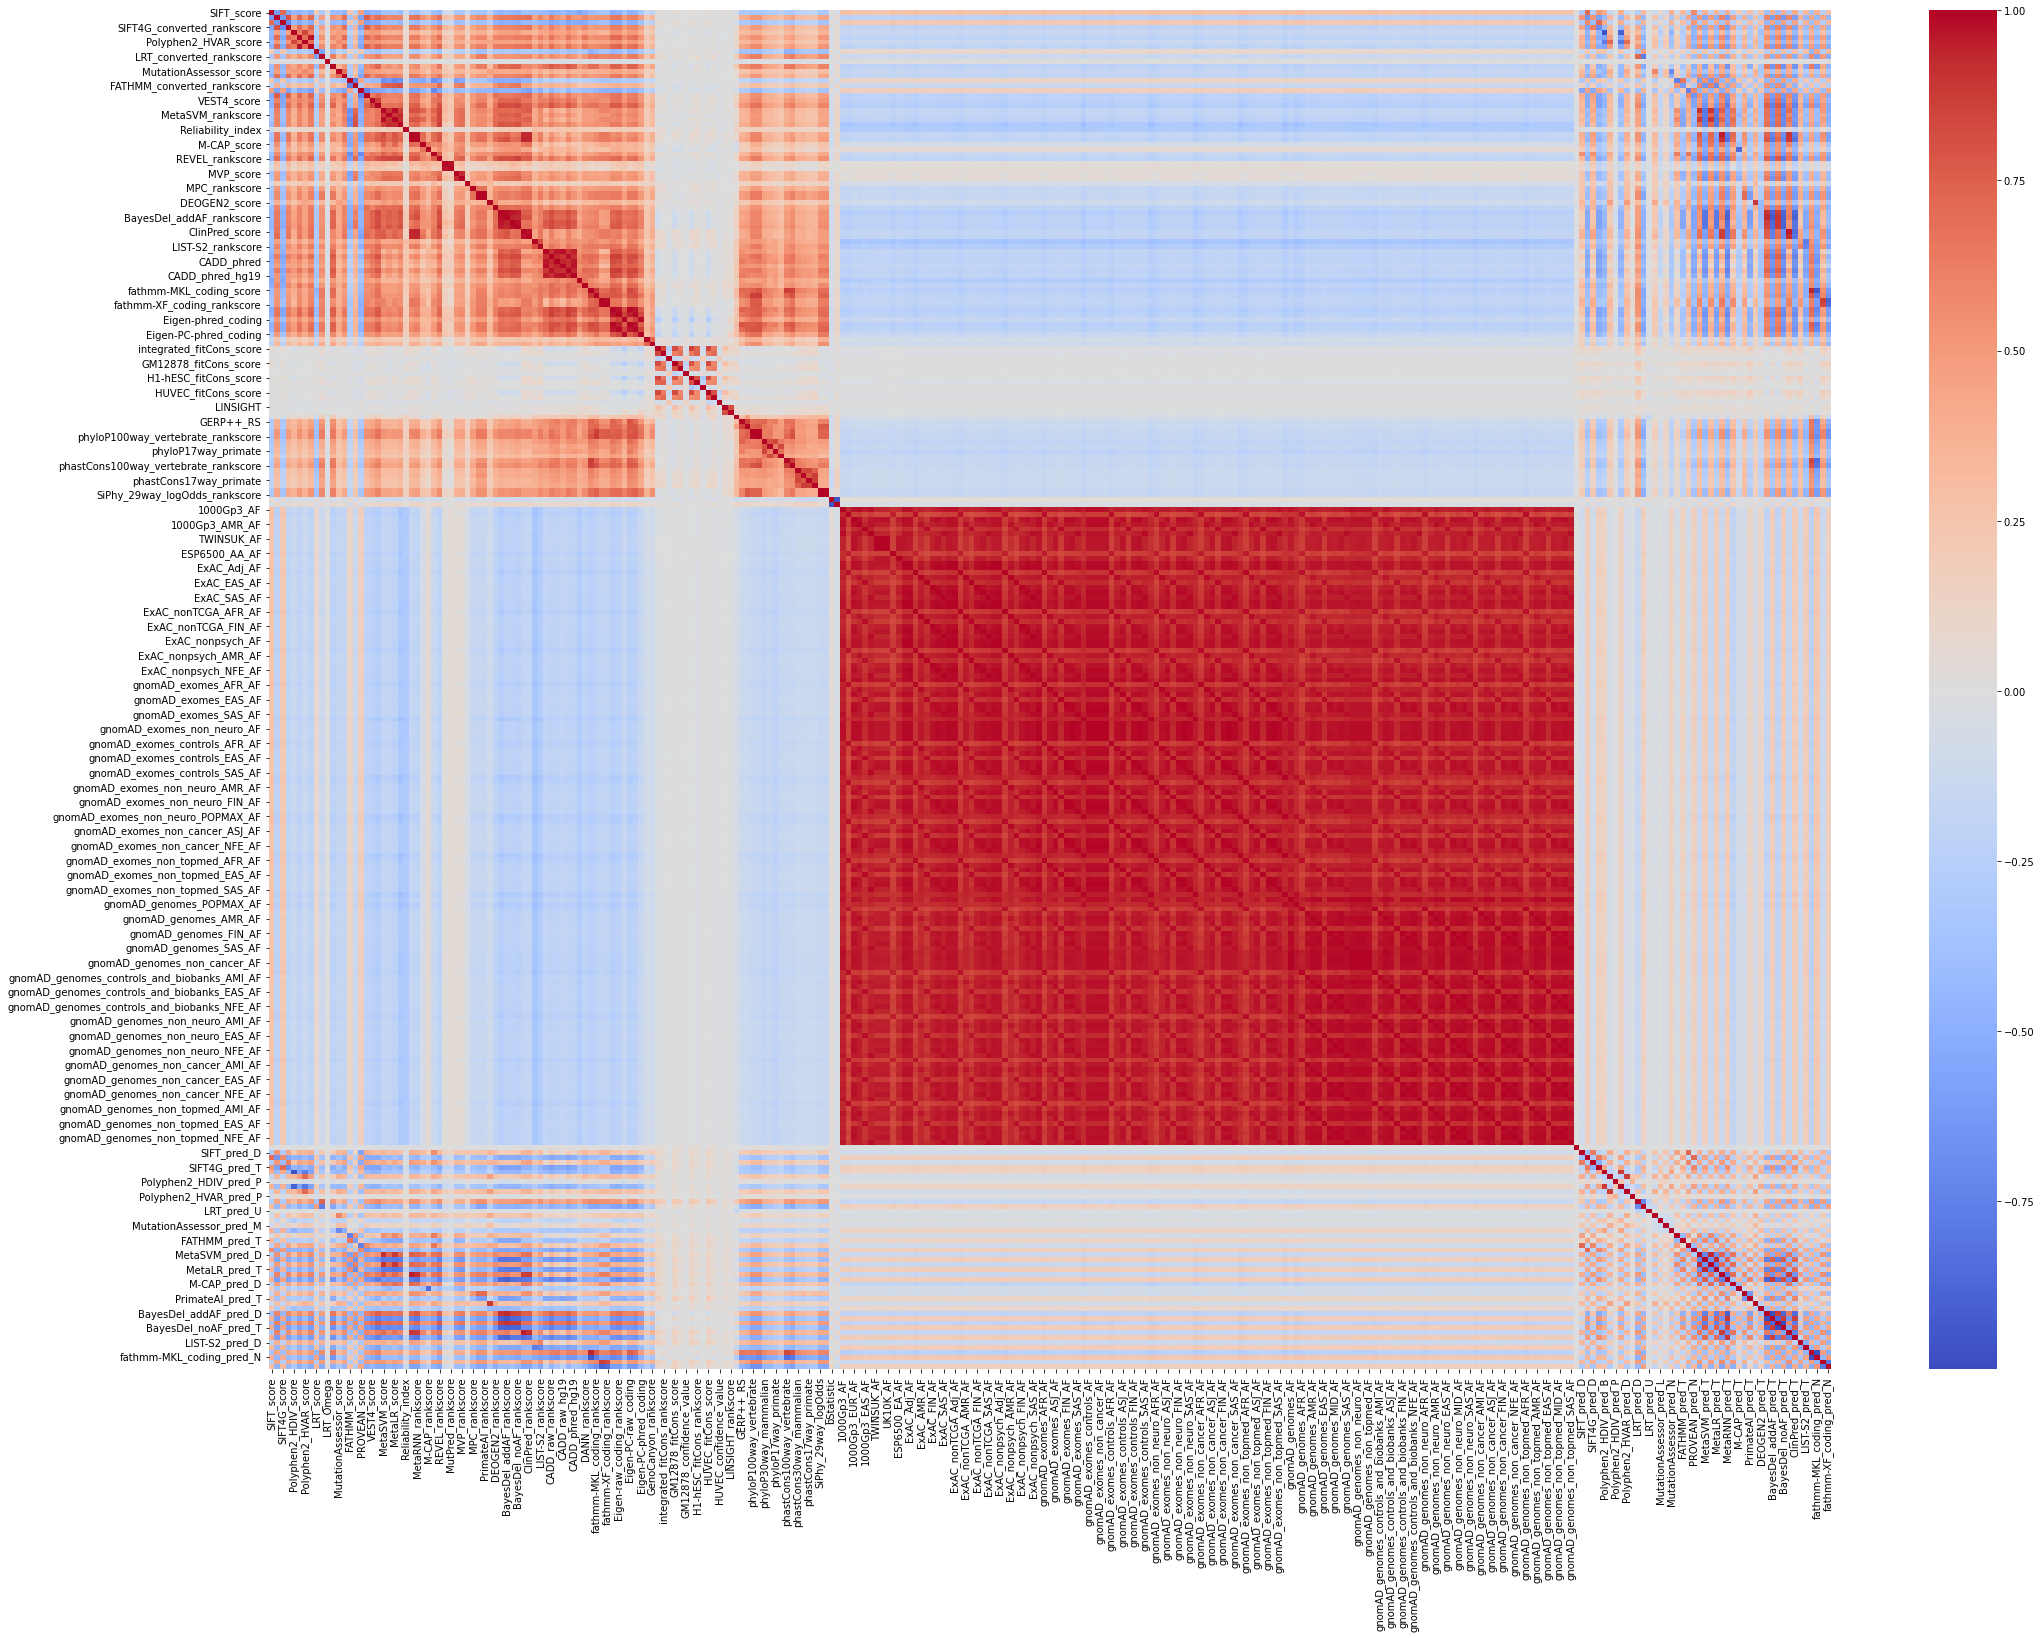

In [37]:
fig = plt.figure(figsize=(35, 25))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, fmt=".2g", cmap="coolwarm")

In [ ]:
# Create correlation matrix
corr_matrix_abs = corr_matrix.abs()

# Select upper triangle of correlation matrix
upper = corr_matrix_abs.where(
            np.triu(np.ones(corr_matrix_abs.shape), k=1).astype(np.bool)
        )



In [ ]:
# Find features with correlation greater than 0.9
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
print(len(to_drop))
print(
            f"Correlated columns being dropped: {to_drop}"
        )



In [62]:
279-156

123

In [63]:
# Drop features
df.drop(to_drop, axis=1, inplace=True)
df = df.reset_index(drop=True)

In [38]:
df.shape

(287358, 279)

<AxesSubplot:>

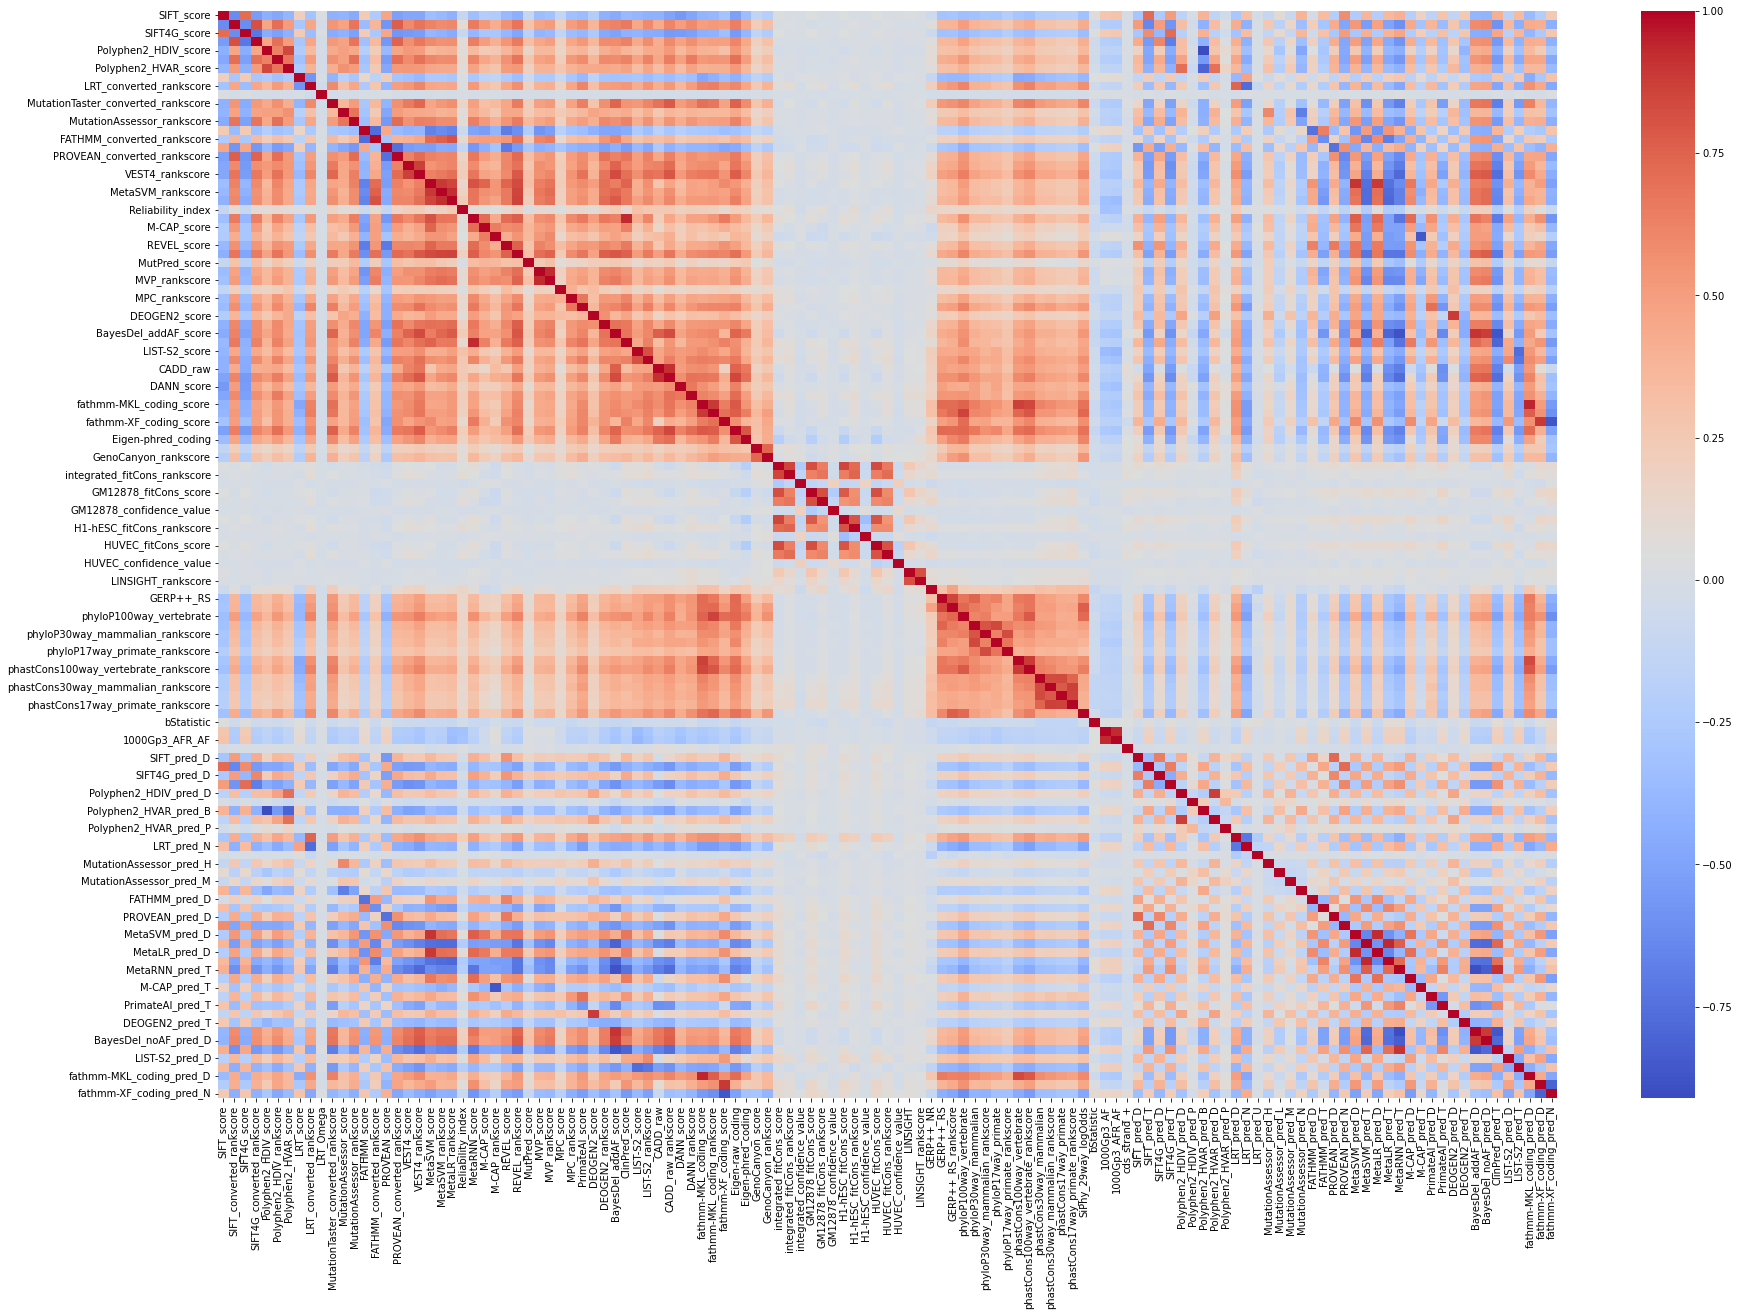

In [65]:
fig = plt.figure(figsize=(30,20))
sns.heatmap(df.corr(), fmt=".2g", cmap="coolwarm")

In [39]:
#Give variant IDs and add the variant info columns
#df = df.reset_index(drop=True)
#df['ID'] = [f'var_{num}' for num in range(len(df))]
#print('NAs filled!')
df = pd.concat([var.reset_index(drop=True), df.reset_index(drop=True)], axis=1)

In [40]:
train_columns = df.columns.values.tolist()
print(train_columns)

['#chr', 'pos(1-based)', 'ref', 'alt', 'aaref', 'aaalt', 'genename', 'Ensembl_geneid', 'Ensembl_transcriptid', 'Ensembl_proteinid', 'Uniprot_acc', 'clinvar_review', 'Interpro_domain', 'SIFT_score', 'SIFT_converted_rankscore', 'SIFT4G_score', 'SIFT4G_converted_rankscore', 'Polyphen2_HDIV_score', 'Polyphen2_HDIV_rankscore', 'Polyphen2_HVAR_score', 'Polyphen2_HVAR_rankscore', 'LRT_score', 'LRT_converted_rankscore', 'LRT_Omega', 'MutationTaster_converted_rankscore', 'MutationAssessor_score', 'MutationAssessor_rankscore', 'FATHMM_score', 'FATHMM_converted_rankscore', 'PROVEAN_score', 'PROVEAN_converted_rankscore', 'VEST4_score', 'VEST4_rankscore', 'MetaSVM_score', 'MetaSVM_rankscore', 'MetaLR_score', 'MetaLR_rankscore', 'Reliability_index', 'MetaRNN_score', 'MetaRNN_rankscore', 'M-CAP_score', 'M-CAP_rankscore', 'REVEL_score', 'REVEL_rankscore', 'MutPred_score', 'MutPred_rankscore', 'MVP_score', 'MVP_rankscore', 'MPC_score', 'MPC_rankscore', 'PrimateAI_score', 'PrimateAI_rankscore', 'DEOGEN2

In [41]:
print('\nData shape (After filtering) =', df.shape)
print('Class shape=', y.shape)


Data shape (After filtering) = (287358, 292)
Class shape= (287358,)


In [42]:
# Write it to a file
df.to_csv('../processed/train_no_filter_data-dbnsfp.csv', index=False)
y.to_csv('../processed/train_no_filter_data-y-dbnsfp.csv', index=False)

# Preparing Testing data

In [43]:
df = test_df
print('\nData shape =', df.shape)


Data shape = (49338, 268)


In [44]:
config_dict['Clinsig_test']

['Pathogenic/Likely_pathogenic', 'Benign/Likely_benign']

In [45]:
df= df.loc[df['clinvar_clnsig'].isin(config_dict['Clinsig_test'])]
print('\nclinvar_clnsig:\n', df['clinvar_clnsig'].value_counts())


clinvar_clnsig:
 Benign/Likely_benign            26904
Pathogenic/Likely_pathogenic    22434
Name: clinvar_clnsig, dtype: int64


In [46]:
#Convert classes from HGMD and ClinVar to either "high_impact" or "Low_impact"
y = df.clinvar_clnsig.str.replace(r'Pathogenic/Likely_pathogenic','high_impact')
y = y.str.replace(r'Benign/Likely_benign','low_impact')
print('\nImpact (Class):\n', y.value_counts())


Impact (Class):
 low_impact     26904
high_impact    22434
Name: clinvar_clnsig, dtype: int64


In [47]:
df.drop('clinvar_clnsig', axis=1, inplace=True)


In [48]:
# Drop variant info columns so we can perform one-hot encoding
var = df[config_dict['var']]
df = df.drop(config_dict['var'], axis=1)

In [49]:
# Double check if there are any columns with weird formatting as categorical before performing one-hot encoding
num_cols = df._get_numeric_data().columns

list(set(df.columns) - set(num_cols))

['MutationAssessor_pred',
 'Polyphen2_HDIV_pred',
 'ClinPred_pred',
 'MetaRNN_pred',
 'MetaLR_pred',
 'BayesDel_noAF_pred',
 'DEOGEN2_pred',
 'PROVEAN_pred',
 'fathmm-MKL_coding_pred',
 'SIFT_pred',
 'cds_strand',
 'SIFT4G_pred',
 'MetaSVM_pred',
 'PrimateAI_pred',
 'fathmm-XF_coding_pred',
 'M-CAP_pred',
 'BayesDel_addAF_pred',
 'LRT_pred',
 'FATHMM_pred',
 'Polyphen2_HVAR_pred',
 'LIST-S2_pred']

In [50]:
#Perform one-hot encoding
df = pd.get_dummies(df, prefix_sep='_')

In [51]:
df[config_dict['allele_freq_columns']] = df[config_dict['allele_freq_columns']].fillna(0)

In [52]:


for key in tqdm(median_scores.keys()):
            if key in df.columns:
                df[key] = (
                    df[key]
                    .fillna(median_scores[key])
                    .astype("float32")
                )

100%|██████████| 233/233 [00:00<00:00, 3002.30it/s]


In [53]:

df2 = pd.DataFrame()
for key in tqdm(train_columns):
            if key in df.columns:
                df2[key] = df[key]
            else:
                df2[key] = 0

100%|██████████| 292/292 [00:00<00:00, 1976.95it/s]


In [54]:
print('\nData shape (nsSNV) =', df2.shape)


Data shape (nsSNV) = (49338, 292)


In [55]:
# Check how many columns are null
df2.isnull().sum(axis = 0)

#chr                                           49338
pos(1-based)                                   49338
ref                                            49338
alt                                            49338
aaref                                          49338
aaalt                                          49338
genename                                       49338
Ensembl_geneid                                 49338
Ensembl_transcriptid                           49338
Ensembl_proteinid                              49338
Uniprot_acc                                    49338
clinvar_review                                 49338
Interpro_domain                                49338
SIFT_score                                         0
SIFT_converted_rankscore                           0
SIFT4G_score                                       0
SIFT4G_converted_rankscore                         0
Polyphen2_HDIV_score                               0
Polyphen2_HDIV_rankscore                      

In [56]:
df2 = df2.drop(config_dict['var'], axis=1)

In [57]:
print('\nData shape (nsSNV) =', df2.shape)


Data shape (nsSNV) = (49338, 279)


In [58]:
df = df2
del df2

In [59]:
df.shape[0] == var.shape[0]

True

In [60]:
df = pd.concat([var.reset_index(drop=True), df.reset_index(drop=True)], axis=1)

In [61]:
print('\nData shape (nsSNV) =', df.shape)


Data shape (nsSNV) = (49338, 292)


In [62]:
# Check how many columns are null
df.isnull().sum(axis = 0)

#chr                                               0
pos(1-based)                                       0
ref                                                0
alt                                                0
aaref                                           2076
aaalt                                           2076
genename                                           0
Ensembl_geneid                                     0
Ensembl_transcriptid                               0
Ensembl_proteinid                                  0
Uniprot_acc                                      847
clinvar_review                                     0
Interpro_domain                                34463
SIFT_score                                         0
SIFT_converted_rankscore                           0
SIFT4G_score                                       0
SIFT4G_converted_rankscore                         0
Polyphen2_HDIV_score                               0
Polyphen2_HDIV_rankscore                      

In [63]:
# Write it to a file
df.to_csv('../processed/test_no_filter_data-dbnsfp.csv', index=False)
y.to_csv('../processed/test_no_filter_data-y-dbnsfp.csv', index=False)

In [159]:
df = df1

In [160]:
benchmark_columns = ['SIFT_score','MutationAssessor_score','CADD_phred','DANN_score','DEOGEN2_score','LRT_score','M-CAP_score','MetaLR_score','MetaSVM_score','MetaRNN_score','ClinPred_score','MutPred_score','VEST4_score','PrimateAI_score']
benchmark_df = df[benchmark_columns]
benchmark_df.columns = ['SIFT','MutationAssessor','CADD','DANN','DEOGEN2','LRT','M-CAP','MetaLR','MetaSVM','MetaRNN','ClinPred','MutPred','VEST4','PrimateAI']
benchmark_df = pd.concat([benchmark_df.reset_index(drop=True), y.reset_index(drop=True)], axis=1)
benchmark_df.head()

,SIFT,MutationAssessor,CADD,DANN,DEOGEN2,LRT,M-CAP,MetaLR,MetaSVM,MetaRNN,ClinPred,MutPred,VEST4,PrimateAI,clinvar_clnsig
0,NaN,NaN,29.700001,0.998092,0.595316,0.003497,0.01394,0.1527,-0.858,0.710692,0.996041,NaN,NaN,0.905049,low_impact
1,0.0,NaN,29.700001,0.998092,NaN,0.003497,0.01394,0.1527,-0.858,0.710692,0.996041,NaN,NaN,0.905049,low_impact
2,0.0,2.255,29.700001,0.998092,0.062945,0.003497,0.01394,0.1527,-0.858,0.710692,0.996041,NaN,0.909,0.905049,low_impact
3,NaN,NaN,29.700001,0.998092,0.150567,0.003497,0.01394,0.1527,-0.858,0.710692,0.996041,NaN,0.890,0.905049,low_impact
4,NaN,NaN,29.700001,0.998092,0.085518,0.003497,0.01394,0.1527,-0.858,0.710692,0.996041,NaN,0.908,0.905049,low_impact


In [161]:
benchmark_df.shape

(1544830, 15)

In [95]:
# Write it to a file
benchmark_df.to_csv('../processed/benchmark_filtered_95_data-dbnsfp.csv', index=False)

In [64]:
def test_parsing(dataframe, config_dict, train_columns, median_scores):
    # Drop variant info columns so we can perform one-hot encoding
    var = dataframe[config_dict['var']]
    dataframe = dataframe.drop(config_dict['var'], axis=1)
    #dataframe['DEOGEN2_score'] = [np.max([float(item.replace('.', '0')) if item == '.' else float(item) for item in i]) if type(i) is list else i for i in dataframe['DEOGEN2_score'].str.split('&')]
    #Perform one-hot encoding
    dataframe = pd.get_dummies(dataframe, prefix_sep='_')
    dataframe[config_dict['allele_freq_columns']] = dataframe[config_dict['allele_freq_columns']].fillna(0)
    
    for key in tqdm(median_scores.keys()):
            if key in dataframe.columns:
                dataframe[key] = (
                    dataframe[key]
                    .fillna(median_scores[key])
                    .astype("float32")
                )
                
    df2 = pd.DataFrame()
    for key in tqdm(train_columns):
            if key in dataframe.columns:
                df2[key] = dataframe[key]
            else:
                df2[key] = 0
    
    del dataframe

                
    df2 = df2.drop(config_dict['var'], axis=1)
    df2 = pd.concat([var.reset_index(drop=True), df2.reset_index(drop=True)], axis=1)
    return df2

In [65]:
df=df1

In [66]:
df2 = test_parsing(df, config_dict, train_columns, median_scores)
print('\nData shape (nsSNV) =', df2.shape)
# Write it to a file
df2.to_csv('../processed/all_data_no_filter-dbnsfp.csv', index=False)

100%|██████████| 292/292 [00:02<00:00, 131.74it/s]



Data shape (nsSNV) = (1521194, 292)
